# Prosper Loans Data Exploration
## by Yahya Abbas

## Preliminary Wrangling

This document explores a loans dataset that contains details about 113,937 loans with 81 attributes on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load the datase

col_list = ['ListingNumber', 'LoanOriginalAmount', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'AmountDelinquent', 'AvailableBankcardCredit', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'Recommendations']
loans = pd.read_csv('prosperLoanData.csv', usecols = col_list)
loans.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,AmountDelinquent,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,Recommendations
0,193129,36,Completed,0.16516,0.1580,0,CO,Other,Self-employed,True,472.0,1500.0,0.17,3083.333333,9425,0
1,1209647,36,Current,0.12016,0.0920,2,CO,Professional,Employed,False,0.0,10266.0,0.18,6125.000000,10000,0
2,81716,36,Completed,0.28269,0.2750,0,GA,Other,Not available,False,NaN,NaN,0.06,2083.333333,3001,0
3,658116,36,Current,0.12528,0.0974,16,GA,Skilled Labor,Employed,True,10056.0,30754.0,0.15,2875.000000,10000,0
4,909464,36,Current,0.24614,0.2085,2,MN,Executive,Employed,True,0.0,695.0,0.26,9583.333333,15000,0


In [3]:
# overview of data shape and composition
loans.shape

(113937, 16)

In [4]:
# datatypes of the variables
loans.dtypes

ListingNumber                  int64
Term                           int64
LoanStatus                    object
BorrowerAPR                  float64
BorrowerRate                 float64
ListingCategory (numeric)      int64
BorrowerState                 object
Occupation                    object
EmploymentStatus              object
IsBorrowerHomeowner             bool
AmountDelinquent             float64
AvailableBankcardCredit      float64
DebtToIncomeRatio            float64
StatedMonthlyIncome          float64
LoanOriginalAmount             int64
Recommendations                int64
dtype: object

### What is the structure of your dataset?

The Prosper Loans dataset has details about 113,937 loans with 81 attributes related with those loans.

I Chose to work with 17 of those attributes, namely, ('ListingNumber', 'LoanOriginalAmount', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'AmountDelinquent', 'AvailableBankcardCredit', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'Recommendations'). 

Most of those attributes are numeric, but the variables ('LoanStatus', 'ListingCategory (numeric)',  'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner') are categorical nominal variables.

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in figuring out what features are best for predicting if a loan will be completed or not.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Since the original dataset contianed more than 80 attributes, I chose 17 attributes that I susbect will have a correlation with the completed status I'm interested in to ease. However, an attribute like the ListingNumber is included for bookkeeping efforts and won't help in such analysis. I also doubt that the ListingCategory, The BorrowerState, or the AmountDelinquent will have much effect on the LoanStatus.

The attributes I susbect will have a large effect on the LoanStatus are the StatedMonthlyIncome, DebtToIncomeRatio, AvailableBankcardCredit. I believe The remaining attributes will have an effect on the LoanStatus, but less than the 3 I stated earlier

## Univariate Exploration

### Categorical Variables
We start by exploring the feature of interest, LoanStatus

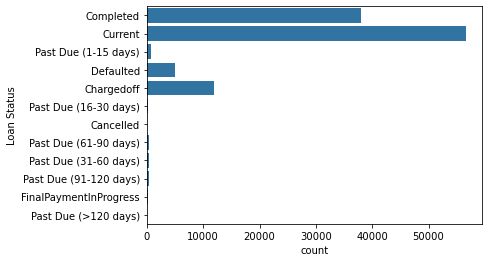

In [5]:
# I chose to work with a horizontal bar chart to improve categories readability
base_color = sb.color_palette()[0]
sb.countplot(data=loans, y='LoanStatus', color=base_color);
plt.ylabel('Loan Status');

We notice that Completed loans, the one we are intersted in, is the second most common category after loans with Current status.

We also notice that Chargedoff and Defaulted statused are the 3rd and 4th most common, respectively. 

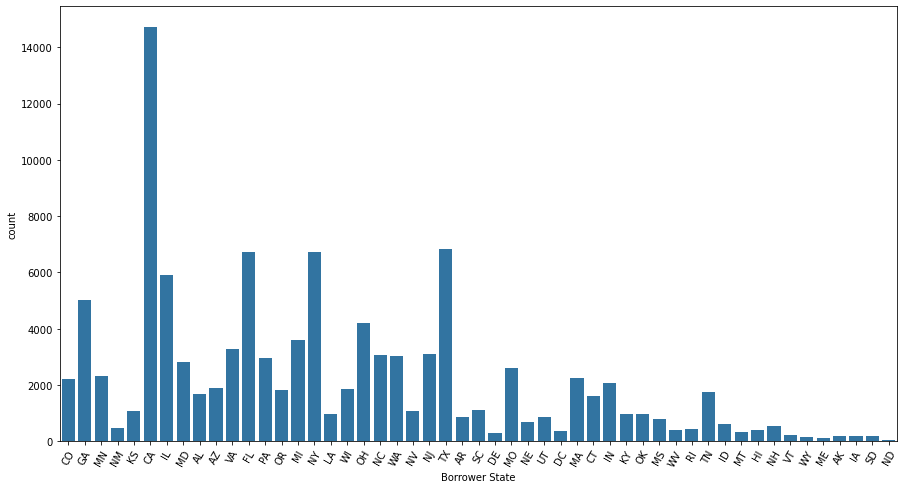

In [6]:
# Now, we explore the Borrower State
plt.figure(figsize=(15,8))
sb.countplot(data=loans, x='BorrowerState', color=base_color);
plt.xticks(rotation=60);
plt.xlabel('Borrower State');

It is worth noticing that California is the state with highest number of loans.

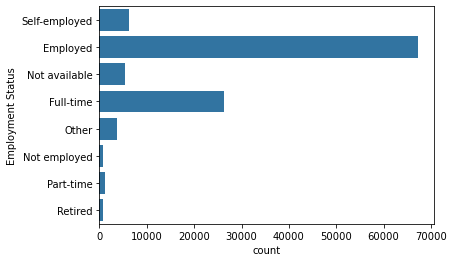

In [7]:
# What about Employment Status?
sb.countplot(data=loans, y='EmploymentStatus', color=base_color);
plt.ylabel('Employment Status');

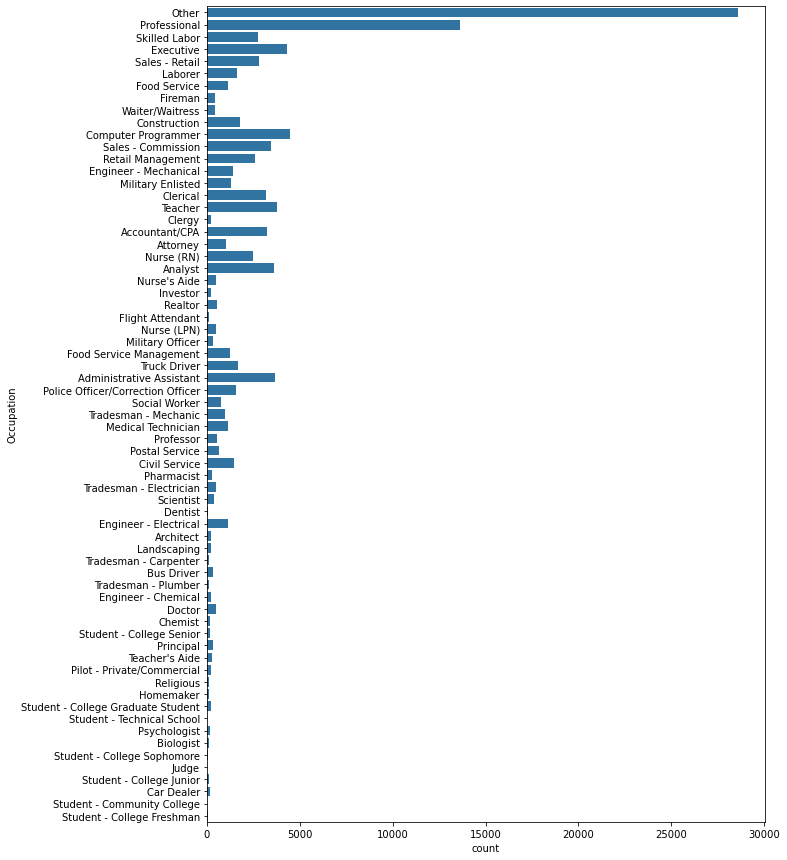

In [8]:
# Occupation?
plt.figure(figsize=(10, 15))
sb.countplot(data=loans, y='Occupation', color=base_color);

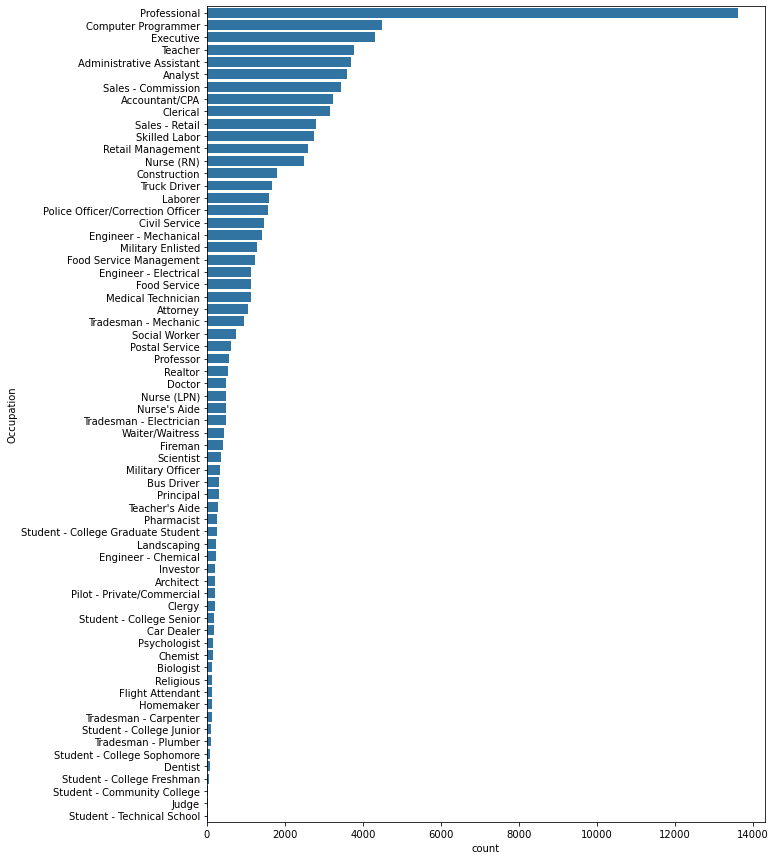

In [9]:
# We notice that Other has a much higher value than the rest of the categories, we discard it from the graph in order to focus on other categories

plt.figure(figsize=(10, 15))
sb.countplot(data=loans, y='Occupation', color=base_color, order=loans.Occupation.value_counts().iloc[1:].index);

We see that those who are employed, adding the Self-employed, Employed, Full-time, and Part-time listings together, are much more presesnt in the dataset. This is contrary to my previous assumption that those who are unemployed would be more present.

Moreover, for the Occupation part, we notice that most of the dataset is either listed as Other, Professional, Computer Programmer, or Executive

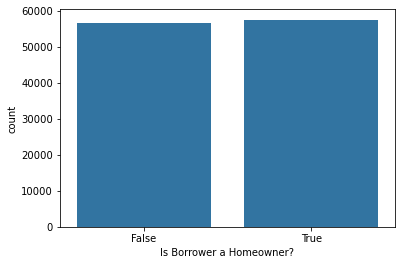

In [10]:
# Let's check if there is a difference between Homeowners and those who are not
sb.countplot(data=loans, x='IsBorrowerHomeowner', color=base_color);
plt.xlabel('Is Borrower a Homeowner?');

There are slightly more people who are homeowners, but it's not a significant difference.

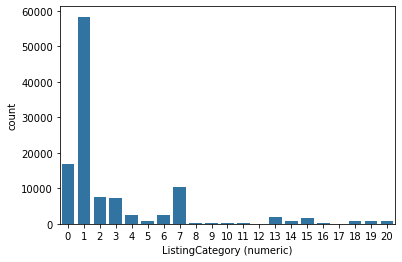

In [11]:
# Now, let's check the last categorical variable, ListingCategory (numeric)
sb.countplot(data=loans, x='ListingCategory (numeric)', color=base_color);

In [12]:
# The numbers in the listng category are not really interpretable as is. Instead I will create a new     ListingCategory column that has labes instead of numbers.

listing_categories = {"ListingCategory (numeric)": {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans' }}

loans['ListingCategory'] = loans.replace(listing_categories)['ListingCategory (numeric)']
loans.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,AmountDelinquent,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,Recommendations,ListingCategory
0,193129,36,Completed,0.16516,0.1580,0,CO,Other,Self-employed,True,472.0,1500.0,0.17,3083.333333,9425,0,Not Available
1,1209647,36,Current,0.12016,0.0920,2,CO,Professional,Employed,False,0.0,10266.0,0.18,6125.000000,10000,0,Home Improvement
2,81716,36,Completed,0.28269,0.2750,0,GA,Other,Not available,False,NaN,NaN,0.06,2083.333333,3001,0,Not Available
3,658116,36,Current,0.12528,0.0974,16,GA,Skilled Labor,Employed,True,10056.0,30754.0,0.15,2875.000000,10000,0,Motorcycle
4,909464,36,Current,0.24614,0.2085,2,MN,Executive,Employed,True,0.0,695.0,0.26,9583.333333,15000,0,Home Improvement


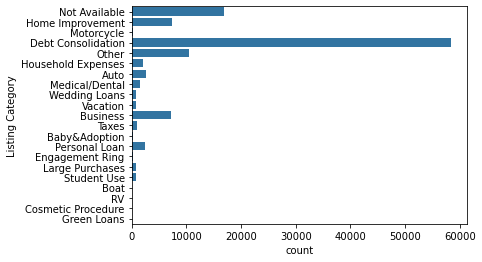

In [13]:
# Now, let's check the last categorical variable, ListingCategory
sb.countplot(data=loans, y='ListingCategory', color=base_color);
plt.ylabel('Listing Category');

Interestingly, the listing category that is most common is Debt Consolidation, which is defined on [Wikipedia](https://en.wikipedia.org/wiki/Debt_consolidation) as a form of debt refinancing that entails taking out one loan to pay off many others.

Other common listings are Not Available, Other, Business, & Home Improvement.

### Numeric Variables

In [14]:
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,ListingCategory (numeric),AmountDelinquent,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,Recommendations
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,106315.000000,106393.000000,105383.000000,1.139370e+05,113937.00000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,2.774209,984.507059,11210.225447,0.275947,5.608026e+03,8337.01385,0.048027
std,3.280762e+05,10.436212,0.080364,0.074818,3.996797,7158.270157,19818.361309,0.551759,7.478497e+03,6245.80058,0.332353
min,4.000000e+00,12.000000,0.006530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1000.00000,0.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,1.000000,0.000000,880.000000,0.140000,3.200333e+03,4000.00000,0.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,1.000000,0.000000,4100.000000,0.220000,4.666667e+03,6500.00000,0.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,3.000000,0.000000,13180.000000,0.320000,6.825000e+03,12000.00000,0.000000
max,1.255725e+06,60.000000,0.512290,0.497500,20.000000,463881.000000,646285.000000,10.010000,1.750003e+06,35000.00000,39.000000


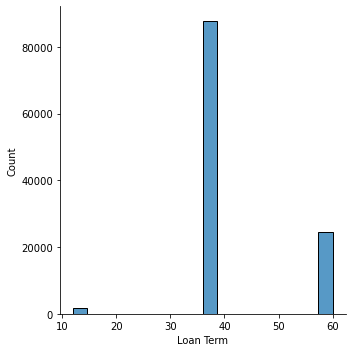

In [15]:
sb.displot(loans['Term']);
plt.xlabel('Loan Term');

In [16]:
# I noticed that the term variable seems to be a categorical one, in having apparently only 3 distinct values. I confirm this finding before treating it accordingly.
loans.Term.unique()

array([36, 60, 12], dtype=int64)

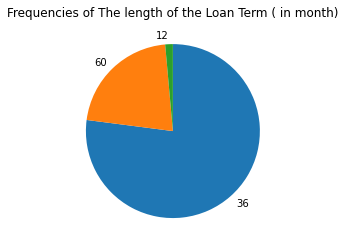

In [17]:
sorted_counts = loans['Term'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, );
ax = plt.gca()
ax.set_title('Frequencies of The length of the Loan Term ( in month)');

As susbected, the Term variable turned out to be a categorical one that has three distinct values.
Also, the most common loan term is 3 years, or 36 months, which is also the median of these values.

I think it makes sense that, for most loans, the loan Term would be around or the median of the available terms.

C:\Users\YahyaAbbas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


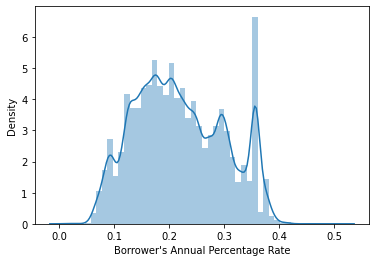

In [18]:
# Next, we explore the Borrower APR, which is The Borrower's Annual Percentage Rate (APR) for the loan.
sb.distplot(loans.BorrowerAPR);
plt.xlabel("Borrower's Annual Percentage Rate");

The distribution of the Borrower APR variable looks multimodal, with a large peak centered around 0.2, a smaller peak centered around 0.3, and finally a small peak around 0.35.
The peak around 0.35 is strange in that it corresponds to a much higher density than the rest of  the values.

This multimodality might be a result of different distributions, for example, the small peaks around 0.3 and 0.35 might correspons to the distribtion of those who defaulted or were charged off. While the large peak around 0.2 might correspond to those who completed or are current with their loans.

C:\Users\YahyaAbbas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


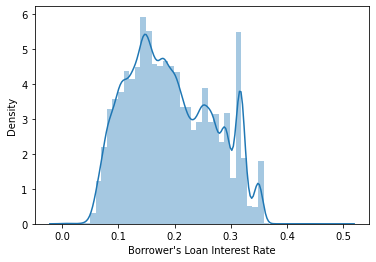

In [19]:
sb.distplot(loans.BorrowerRate);
plt.xlabel("Borrower's Loan Interest Rate");

Since Borrower APR and Borrower Interest Rate are related, It's only natural for the Borrower's Loan Interest Rate distribution to similar to that of the Borrower's APR.

However, we notice that the large peak has shifted towards 0.25, which is explained by the fact that [APR](https://www.bankofamerica.com/mortgage/learn/apr-vs-interest-rate/) includes other relevant fees and costs.

From here on, I will only refer to APR for analysis, as it gives more information about what a loan actually costs. 

C:\Users\YahyaAbbas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


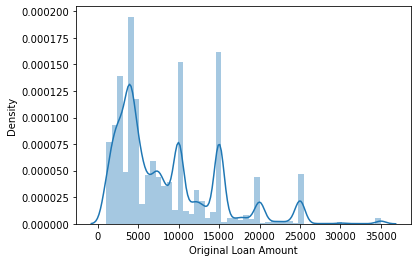

In [20]:
# We now explore the Original Loan Amount
sb.distplot(loans.LoanOriginalAmount);
plt.xlabel("Original Loan Amount");

The distribution of the Original Loan Amount is multimodal as well, but the peaks seem to always happen at multiples of 5000$. Moreover, the number of people requesting a loan decreases as the Loan amount increases.

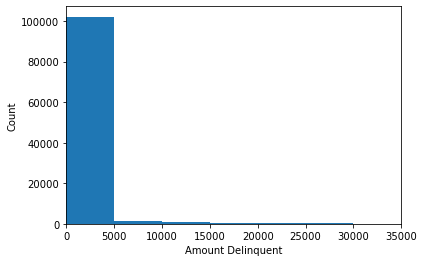

In [21]:
# Next we explore the AmountDelinquent, which is the amount by which a borrower is behind on loan payments
bins = np.arange(0, loans['AmountDelinquent'].max()+1000, 5000)
#sb.displot(loans.AmountDelinquent);
plt.hist(data=loans, x='AmountDelinquent', bins=bins);
plt.xlabel("Amount Delinquent");
plt.ylabel('Count');
plt.xlim((0, 35000));

Most borrowers who are behind on loan payment have a delinquent amount that ranges from 0 to 5000$. 

This amount seems to be small at first, but comparing it with the amounts of the original loans, it might be a bit concerning. Considering that many of the borrowers request a loan around 5000$.

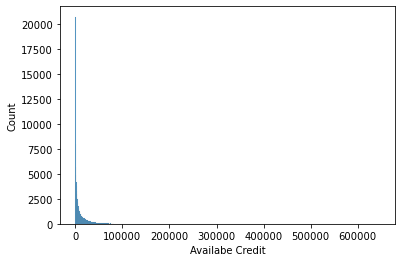

In [22]:
# Let's explore the AvailableBankcardCredit variable
sb.histplot(loans.AvailableBankcardCredit);
plt.xlabel('Availabe Credit');

In [23]:
# Lets take an overview over this variable
print(loans.AvailableBankcardCredit.describe())
print(loans.AvailableBankcardCredit.value_counts().sort_index())

# Notice the tail we got in the previous graph was due to individual values that may be outliers

count    106393.000000
mean      11210.225447
std       19818.361309
min           0.000000
25%         880.000000
50%        4100.000000
75%       13180.000000
max      646285.000000
Name: AvailableBankcardCredit, dtype: float64
0.0         4881
1.0           47
2.0           50
3.0           44
4.0           45
            ... 
477656.0       1
498374.0       1
566480.0       1
572427.0       1
646285.0       1
Name: AvailableBankcardCredit, Length: 31829, dtype: int64


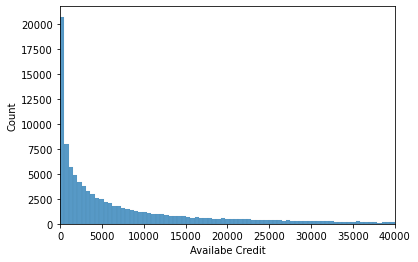

In [24]:
# Limit the graph values to remove outliers
sb.histplot(loans.AvailableBankcardCredit);
plt.xlabel('Availabe Credit');
plt.xlim((0, 40000));

Most of the Borrowers have Available credit in the Range from 0 to 5000$.

As the amount of credit increases, the number of borrowers decreases, which makes sense.

C:\Users\YahyaAbbas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


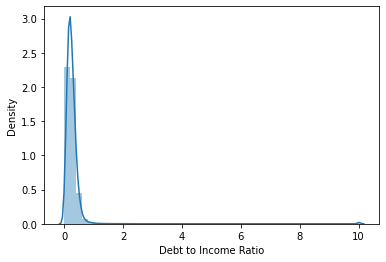

In [25]:
# Let's explore the DebtToIncomeRatio attribute
sb.distplot(loans.DebtToIncomeRatio);
plt.xlabel('Debt to Income Ratio');

In [26]:
# Lets take an overview over this variable
print(loans.DebtToIncomeRatio.describe())
print(loans.DebtToIncomeRatio.value_counts().sort_index())

# Notice the tail we got in the previous graph was due to the fact that this value is capped at 10.01 which corresponds to a debt to income ration more than 1000%

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64
0.00000      19
0.00044       1
0.00310       1
0.00611       1
0.00647       1
           ... 
9.06000       1
9.20000       1
9.44000       1
9.77000       1
10.01000    272
Name: DebtToIncomeRatio, Length: 1207, dtype: int64


C:\Users\YahyaAbbas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


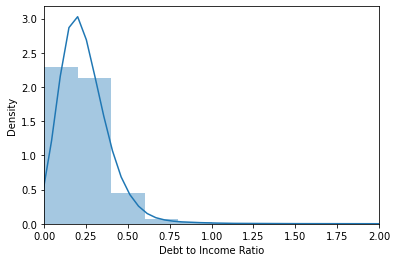

In [27]:
# Limit the graph X axis to remove the outlier value that are at 10
sb.distplot(loans.DebtToIncomeRatio);
plt.xlabel('Debt to Income Ratio');
plt.xlim((0, 2));

Notice the tail we got in the previous graph was due to the fact that this value is capped at 10.01 which corresponds to a debt to income ration more than 1000%.
When we limited those values, we got a more interpretable graph.

The distribution of the Debt to Income Ratio variable looks normally distributed and skewed to the left. Showing that most of the Borrowers have Debt to Income Ratio that is around 0.2

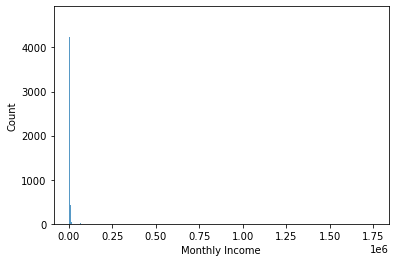

In [28]:
# Now we look at the StatedMonthlyIncome variable
sb.histplot(loans.StatedMonthlyIncome);
plt.xlabel('Monthly Income');

In [29]:
# Lets take an overview over this variable
print(loans.StatedMonthlyIncome.describe())
print(loans.StatedMonthlyIncome.value_counts().sort_index())

# Notice that 75% of the population make less than 6825$ per month

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64
0.000000e+00    1394
8.333300e-02     251
2.500000e-01       1
8.333330e-01       1
1.416667e+00       1
                ... 
4.166667e+05       1
4.666667e+05       1
4.833333e+05       1
6.185478e+05       1
1.750003e+06       1
Name: StatedMonthlyIncome, Length: 13502, dtype: int64


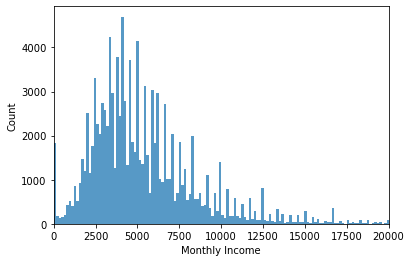

In [30]:
# Limit the graph X axis to remove the outlier values that are more than 20000$
sb.histplot(loans.StatedMonthlyIncome);
plt.xlabel('Monthly Income');
plt.xlim((0, 20000));

In [31]:
# I will remove the outliers of the Monthly Income to be able to do meaningful bivariate plot analyisis later on
loans = loans[loans.StatedMonthlyIncome <= 20000]
loans.shape

(112748, 17)

In [32]:
loans = loans.reset_index(drop=True)

As expected, the Monthly Income of the borrowers looks normally distributed and skewed to the left. Which is in accordance with the intuition that people with lower income tend to request loans more.

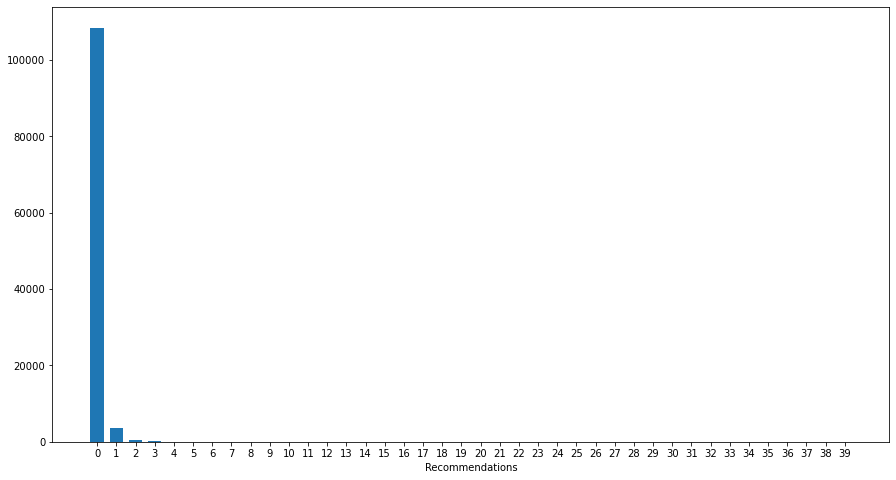

In [33]:
# What about Recommendations
plt.figure(figsize=(15,8))
bin_edges = np.arange(-0.5, 39.5+1, 1)
plt.hist(data=loans, x='Recommendations', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 39+1, 1));
plt.xlabel('Recommendations');

In [34]:
print(loans.Recommendations.value_counts().sort_index())
# Notice that people with 0 reccomendations much more than the rest of the values

0     108507
1       3499
2        567
3        108
4         26
5         14
6          4
7          5
8          3
9          6
14         1
16         2
18         2
19         1
21         1
24         1
39         1
Name: Recommendations, dtype: int64


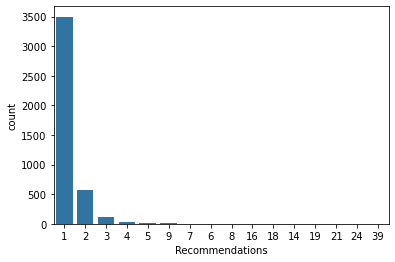

In [35]:
sb.countplot(data=loans, x='Recommendations', color=base_color, order=loans.Recommendations.value_counts().iloc[1:].index);

Most borrowers either have no recmmendations, or 1 recmmendation.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variable of interest, Loan Status (Completed), is a Nominal Categorical Variable. The values didn't differ much from what I expected and I didn't need to perform transformations. The most common status was Current followed by Completed, Charged off, and Defaulted, respectively.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Nothing unusual arised with the Categorical varaibles. However, some of the numerical varaibles had multimodal distributions like the BorrowerAPR, BorrowerRate, and the LoanOriginalAmount, but I didn't perform any operations for that because I believe that is usual with such data.

Moreover, Some varaibles like the AmountDelinquent, StatedMonthlyIncome, DebtToIncomeRation, and AvailableBankCardCredit had some outliers that were bad for reading and understanding the graphs. So, I used axis value limiations to see the distribution without those outliers. I also removed the outliers of the Monthly Income Variable for later work.


## Bivariate Exploration

In this section I'm going to investigate the relationship between Loan Status and the following variables:
- Borrower APR (quantitative)
- Loan Original Amount (quantitative)
- Debt to Income Ratio (quantitative)
- Monthly Income (quantitative)
- Loan Term (qualitative)
- Is Borrower Homeowner (qualitative)

In [36]:
numeric_vars = ['BorrowerAPR', 'LoanOriginalAmount', 'DebtToIncomeRatio', 'StatedMonthlyIncome']
categoric_vars = ['LoanStatus', 'Term', 'IsBorrowerHomeowner']

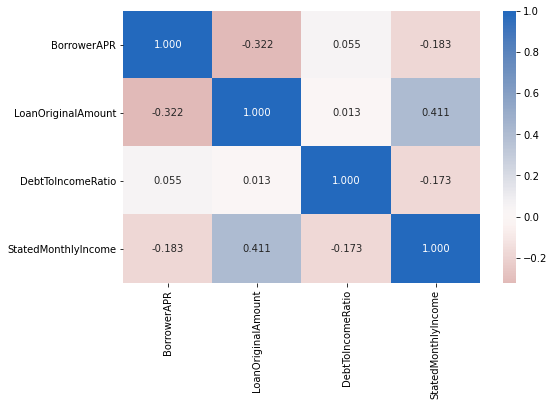

In [37]:
# Seeinf if there are correlations between numeric variables
plt.figure(figsize = [8, 5])
sb.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

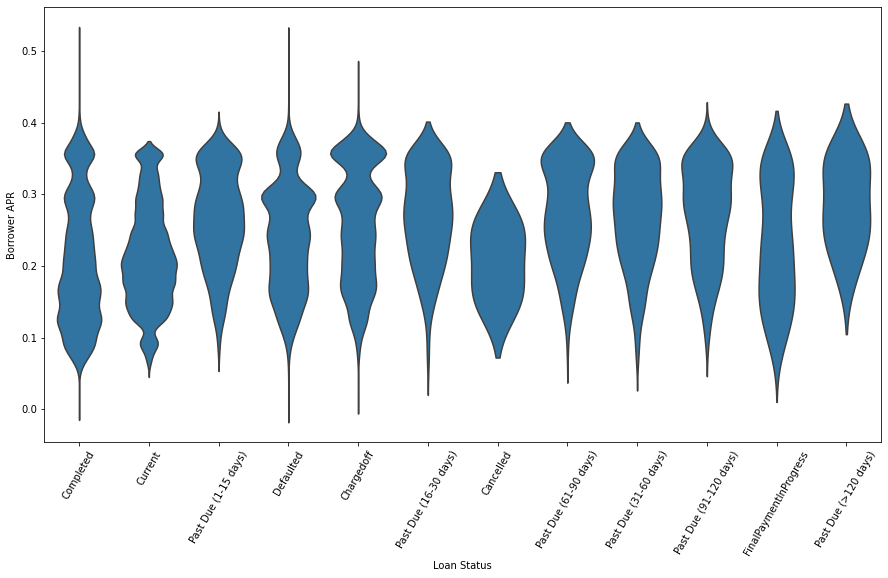

In [38]:
# First let's investigate if there is a relationship between a Borrower's APR and Loan Status
plt.figure(figsize=(15, 8))
sb.violinplot(data=loans, x='LoanStatus', y='BorrowerAPR', color=base_color, inner=None)
plt.xticks(rotation=60);
plt.xlabel('Loan Status');
plt.ylabel('Borrower APR');

From the violin graph, We can't say there is a monotoic relation between the Loan Status and the Borrower APR. But it seems that a Completed or Current loan has lower APR than a loan that is Defaulted or Chargedoff.

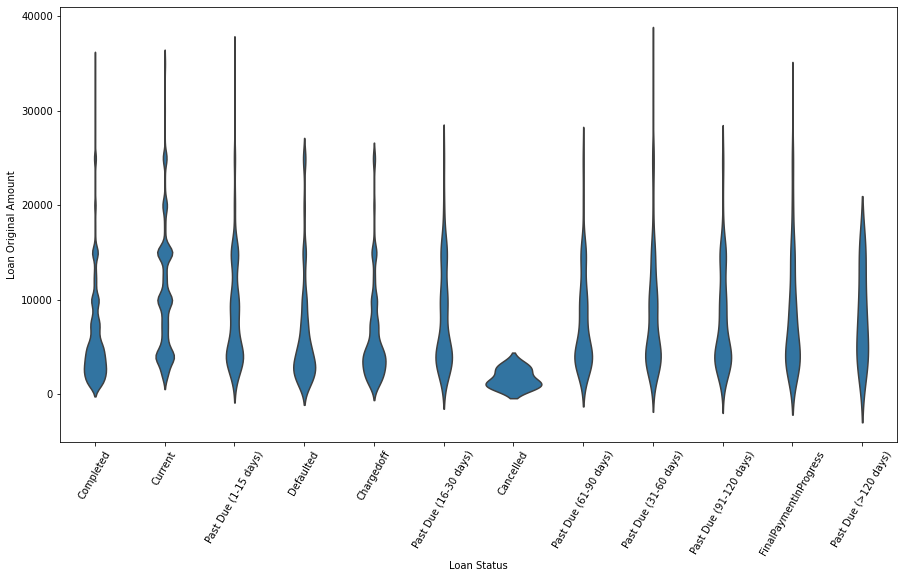

In [39]:
# Now let's investigate if there is a relationship between the Loan Original Amount and the Loan Status
plt.figure(figsize=(15, 8))
sb.violinplot(data=loans, x='LoanStatus', y='LoanOriginalAmount', color=base_color, inner=None)
plt.xticks(rotation=60);
plt.xlabel('Loan Status');
plt.ylabel('Loan Original Amount');

Just like the Borrower APR, there doesn't seem to be a monotonic relationship between the Loann Original Amount and the Loan Status.

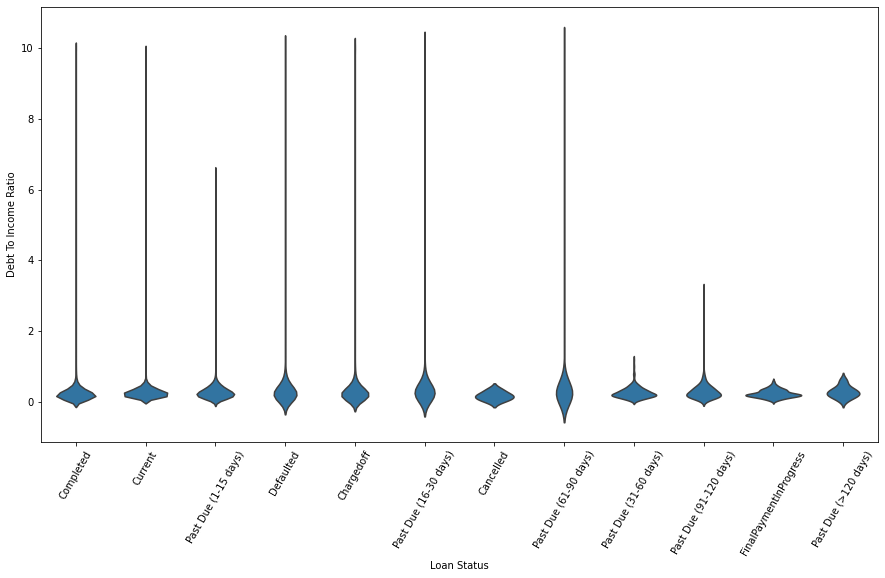

In [40]:
# Now let's investigate if there is a relationship between the Debt to Income Ratio and the Loan Status
plt.figure(figsize=(15, 8))
sb.violinplot(data=loans, x='LoanStatus', y='DebtToIncomeRatio', color=base_color, inner=None)
plt.xticks(rotation=60);
plt.xlabel('Loan Status');
plt.ylabel('Debt To Income Ratio');

There doesn't seem to be a monotonic relationship between the Debt To Income Ratio and the Loan Status as well. This result is strange for me because I thought this variable would have a nice impact on the Loan Status.

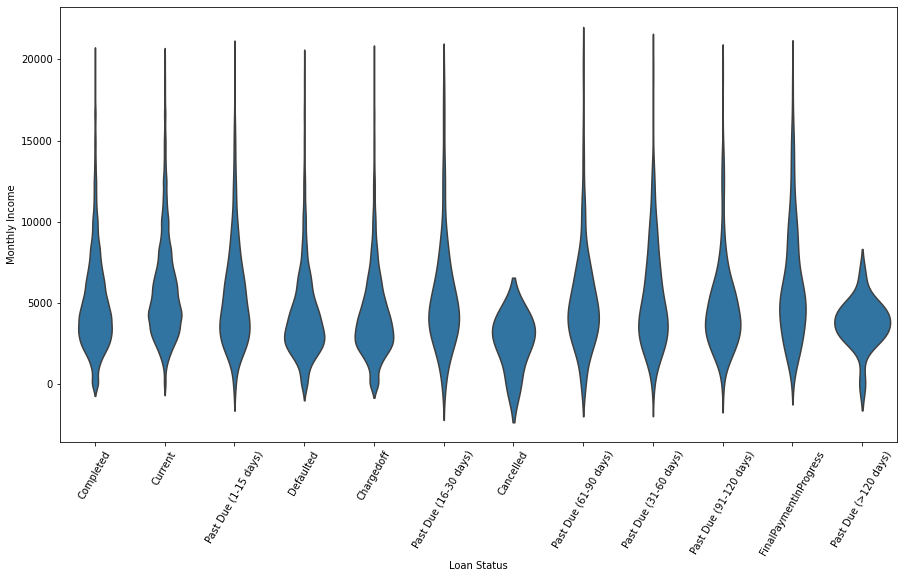

In [41]:
# Next, we see if there is a relationship between the Monthly Income and the Loan Status
plt.figure(figsize=(15, 8))
sb.violinplot(data=loans, x='LoanStatus', y='StatedMonthlyIncome', color=base_color, inner=None)
plt.xticks(rotation=60);
plt.xlabel('Loan Status');
plt.ylabel('Monthly Income');

Seems like Monthly Income also doesn't have a monotonic relationship with the Loan Status, although it seems like loans That are Completed or Current have a slightly higher monthly income than loans that are Defaulted or Chrgedoff.

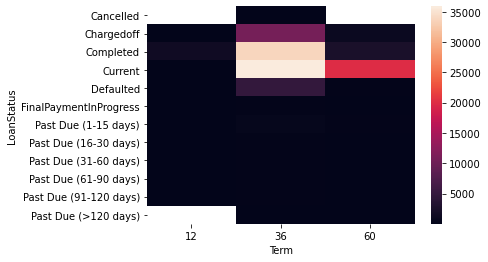

In [42]:
# Let's see if there is a relationship between the Loan Term and the Loan Status

# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = loans.groupby(['LoanStatus', 'Term']).size()

# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'Term', values = 'count')

sb.heatmap(ct_counts);

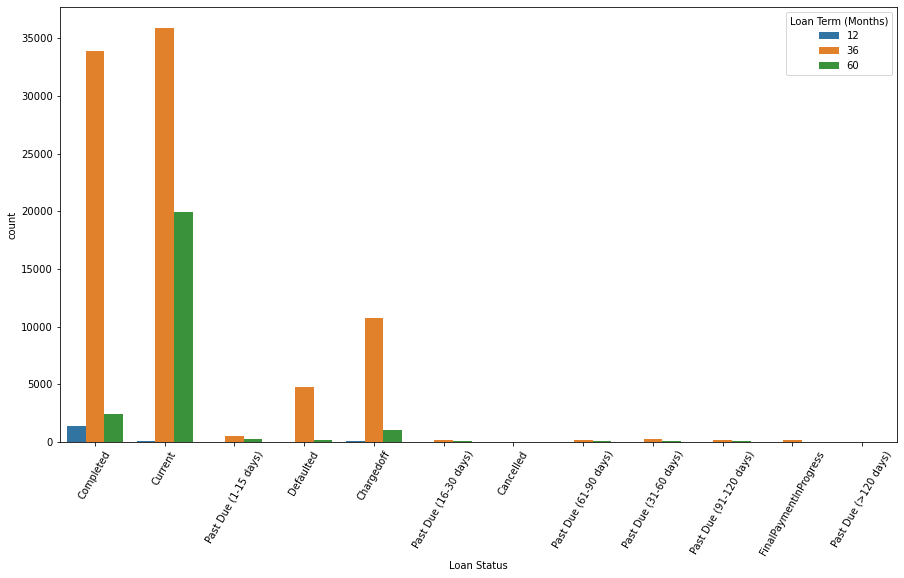

In [43]:
plt.figure(figsize=(15, 8))
sb.countplot(data = loans, x = 'LoanStatus', hue = 'Term');
plt.xticks(rotation=60);
plt.xlabel('Loan Status');
plt.legend(title="Loan Term (Months)");

From the heatmab and the clustered bar chart, It seems there is a positive correlation between the Loan term and the Loan Status. Most of the Completed loans had a term of 36 months. Another  thing worht noting is the relationship between a loan term of 60 months and loans that are Current.

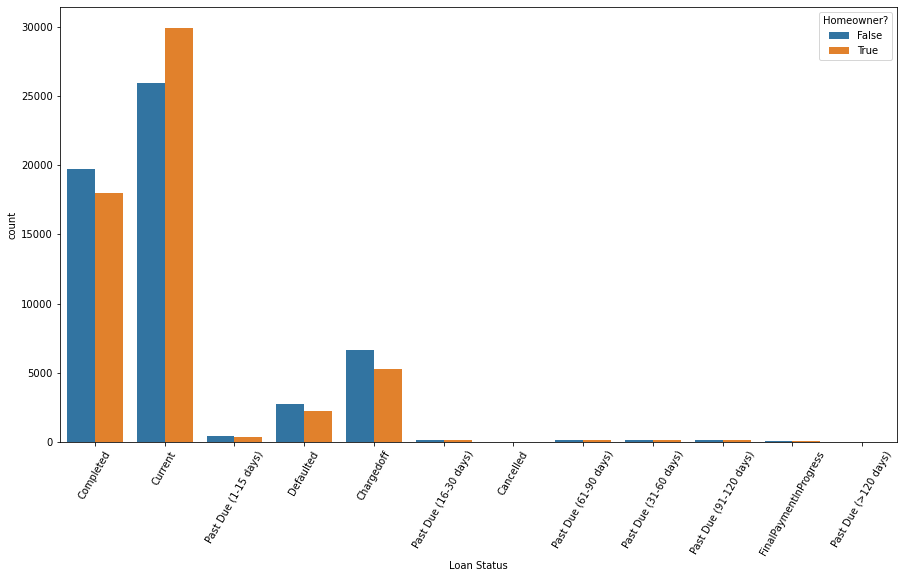

In [44]:
# Let's now explore the relation between being a homeowner and the Loan Status
plt.figure(figsize=(15, 8))
sb.countplot(data = loans, x = 'LoanStatus', hue = 'IsBorrowerHomeowner');
plt.xticks(rotation=60);
plt.xlabel('Loan Status');
plt.legend(title="Homeowner?");

As for the relation between a borrower being a homeowner and the Loan Status, I was surprised to see that Those who are not homeowners complete more loans than homeowners.

The Current loan status, however, followed my intuition that homeowners are more likely to pay their debts.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Most of the variable didn't have the effect I initially assumed they would have on the Loan Status. Surprisingly enough, variables like the Debt to Income Ratio and the Loan Original Amount didn't  have much impact on whether a Loan was Completed or not. 
- The Borrower APR didn't have the impact I susbected it would have, but it seems there is some inverse correlation between Loan Status and the APR, although not highly correlated.
- Completed Loans seem to correlate with a slightly higher Monthly Income than that of Defaulted.
- There is a correlation between the Loan Term and the Loan Status. Loans with 36 or 60 months terms tend to be Completed or stay Current with payments more than those with 12 months terms.
- Another surbrusing result was that homeowners didn't complete loans more than those who are not homeowners. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- There is a negative correlation between the Debt to Income Ratio and the Monthly Income, which is natural.
- There is also some level of positive correlation between the Monthyly Income and the Original Loan Amount. As one of them increases, so does the other.
- A surprising finding is that there is a level of negatice correlation between Original Loan Amount and the Borrower APR.

## Multivariate Exploration

<AxesSubplot:xlabel='LoanStatus', ylabel='Term'>

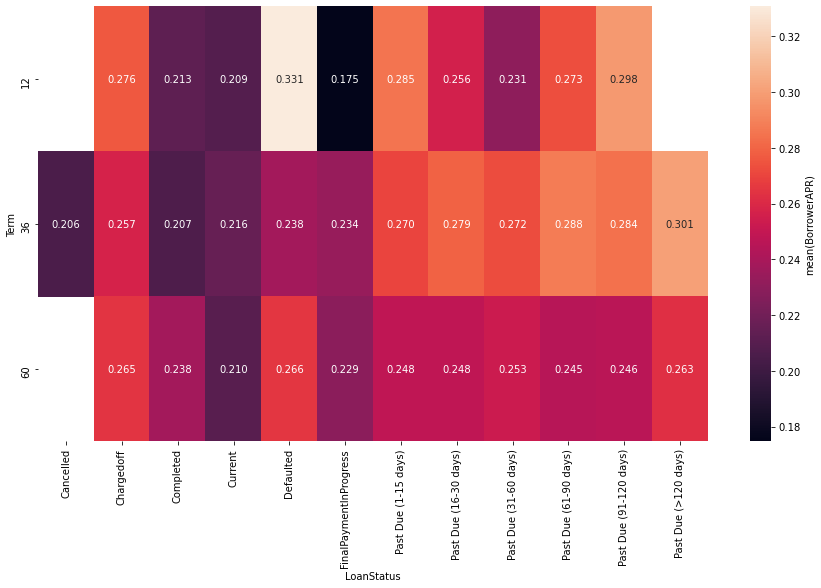

In [45]:
# I want to further investigate the relation between the Loan Status, The Loan Term, and The Borrower APR
plt.figure(figsize=(15,8))
cat_means = loans.groupby(['LoanStatus', 'Term']).mean()['BorrowerAPR']
cat_means = cat_means.reset_index(name = 'BorrowerAPR_avg')
cat_means = cat_means.pivot(index = 'Term', columns = 'LoanStatus',
                            values = 'BorrowerAPR_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(BorrowerAPR)'})

It seems that Borrower APR does in fact impact the Loan Status. All Completed and Current Loans have a mean APR that is less than or equal to 0.238, and if the APR is 0.238, the Loan Term needs to be 60 months in order for the borrower to be able to Complete. The Borrower APR doesn't change much, but the slight effect we susbected in the bivariate analysis is confirmed by those values. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> During this part of the investigation, I confirmed that Borrower APR does in fact affect the Loan Status (In a given Loan Term, APR tends to inversely correlate with the Loan Status). Furthermore, it appears a longer Loan Term leads to Completed or Current Loan Status with higher APR values.

### Were there any interesting or surprising interactions between features?

- For a 12 month Loan Term, any APR higher than 0.22 would lead to Default, Chargeoff, or payment delay.
- For a 36 month Loan Term, any APR higher than 0.237 would lead to Default, Chargeoff, or payment delay.
- For a 60 month Loan Term, any APR higher than 0.238 would lead to Default, Chargeoff, or payment delay.